<a href="https://colab.research.google.com/github/SharylgitData/capstone1/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y bitsandbytes
!pip install -U bitsandbytes
!pip install datasets
!pip install -U langchain-community
!pip install pacmap
!pip install faiss-gpu

!pip install ragatouille
#%pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.9 MB/s eta 0:00:00
   ━━━

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#!pip install -q torch transformers transformers accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl pacmap datasets langchain-community ragatouille

In [ ]:
# %reload_ext dotenv
# %dotenv

In [3]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
import matplotlib.pyplot as plt
from datasets import Dataset
pd.set_option("display.max_colwidth", None)  # This will be helpful when visualizing retriever outputs

In [5]:
with open('raw_data.txt', 'r') as file:
    # Read the entire content of the file
    ds = file.read()

# split it into lines or paragraphs
text_data_lines = ds.split("\n")  # or split by paragraphs or other criteria

# Create a dictionary for the dataset
data = {"text": text_data_lines}

# Convert the dictionary into a Hugging Face Dataset
ds = Dataset.from_dict(data)

# Check the first few entries
print(ds[:5])  # Print the first 5 rows of the dataset


{'text': ['off-road vehicles act', 'r.s.o. 1990, chapter o.4', 'definitions', '1 in this act,', '“conservation officer” means a conservation officer under the fish and wildlife conservation act, 1997 and an officer under the provincial parks and conservation reserves act, 2006; ']}


In [6]:
from langchain.docstore.document import Document as LangchainDocument

# RAW_KNOWLEDGE_BASE = [
#     LangchainDocument(page_content=t)  for t in enumerate(tqdm(ds))
# ]


RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=item['text']) for _, item in enumerate(tqdm(ds))
]


  0%|          | 0/236 [00:00<?, ?it/s]

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# We use a hierarchical list of separators specifically tailored for splitting Markdown documents
# This list is taken from LangChain's MarkdownTextSplitter class
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # The maximum number of characters in a chunk: we selected this value arbitrarily
    chunk_overlap=100,  # The number of characters to overlap between chunks
    add_start_index=False,  # If `True`, includes chunk's start index in metadata
    strip_whitespace=True,  # If `True`, strips whitespace from the start and end of every document
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model's maximum sequence length: 512


  0%|          | 0/233 [00:00<?, ?it/s]

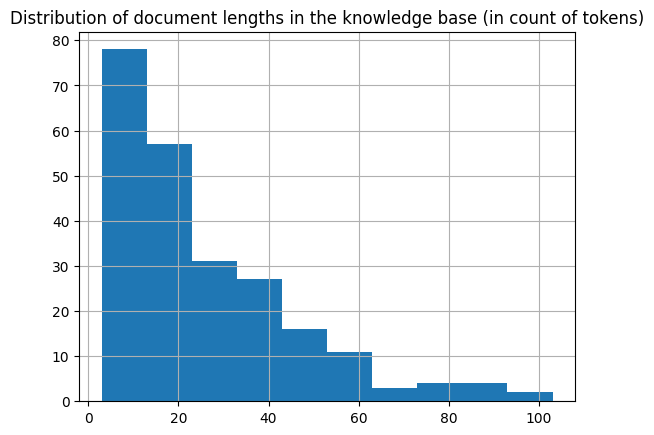

In [8]:
from sentence_transformers import SentenceTransformer

# To get the value of the max sequence_length, we will query the underlying `SentenceTransformer` object used in the RecursiveCharacterTextSplitter
print(f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}")

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

# Plot the distribution of document lengths, counted as the number of tokens
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

  0%|          | 0/213 [00:00<?, ?it/s]

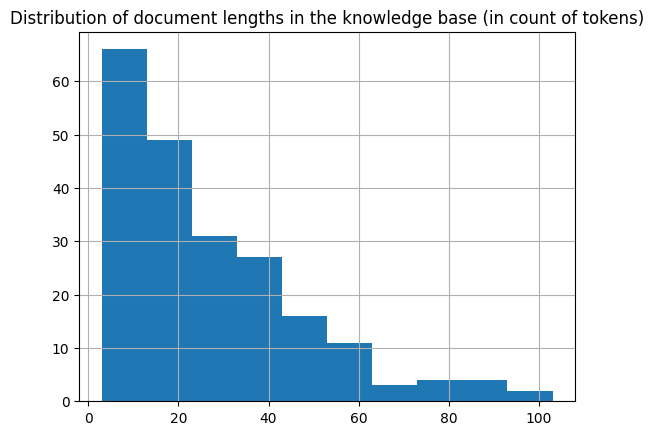

In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"


def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    """
    Split documents into chunks of maximum size `chunk_size` tokens and return a list of documents.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )

    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    # Remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)

    return docs_processed_unique


docs_processed = split_documents(
    512,  # We choose a chunk size adapted to our model
    RAW_KNOWLEDGE_BASE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)

# Let's visualize the chunk sizes we would have in tokens from a common model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [ ]:
#pip install torch==1.2.0+cpu torchvision==0.4.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [10]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},  # Set `True` for cosine similarity
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

<ipython-input-10-86d3e6721df3>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(


In [11]:
# Embed a user query in the same space
user_query = "What is the capital of delhi?"
query_vector = embedding_model.embed_query(user_query)

In [12]:
import pacmap
import numpy as np
import plotly.express as px

embedding_projector = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=1)

embeddings_2d = [
    list(KNOWLEDGE_VECTOR_DATABASE.index.reconstruct_n(idx, 1)[0]) for idx in range(len(docs_processed))
] + [query_vector]

# Fit the data (the index of transformed data corresponds to the index of the original data)
documents_projected = embedding_projector.fit_transform(np.array(embeddings_2d), init="pca")

In [13]:
df = pd.DataFrame.from_dict(
    [
        {
            "x": documents_projected[i, 0],
            "y": documents_projected[i, 1],
            #"source": docs_processed[i].metadata["source"].split("/")[1],
            "extract": docs_processed[i].page_content[:100] + "...",
            "symbol": "circle",
            "size_col": 4,
        }
        for i in range(len(docs_processed))
    ]
    + [
        {
            "x": documents_projected[-1, 0],
            "y": documents_projected[-1, 1],
            "source": "User query",
            "extract": user_query,
            "size_col": 30,
            "symbol": "star",
        }
    ]
)

# Visualize the embedding
fig = px.scatter(
    df,
    x="x",
    y="y",
    color="source",
    hover_data="extract",
    size="size_col",
    symbol="symbol",
    color_discrete_map={"User query": "black"},
    width=1000,
    height=700,
)
fig.update_traces(
    marker=dict(opacity=1, line=dict(width=0, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.update_layout(
    legend_title_text="<b>Chunk source</b>",
    title="<b>2D Projection of Chunk Embeddings via PaCMAP</b>",
)
fig.show()

In [14]:
user_query = "what is the title of the project"
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query, k=5)
print("\n==================================Top document==================================")
print(retrieved_docs[0].page_content)



Starting retrieval for user_query='what is the title of the project'...

==================================Top document==================================
application



A conservation officer is defined as an officer under the Fish and Wildlife Conservation Act, 1997, and the Provincial Parks and Conservation Reserves Act, 2006.

In [ ]:
#!pip install -U bitsandbytes

In [15]:
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

READER_MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
model = AutoModelForCausalLM.from_pretrained(READER_MODEL_NAME, quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained(READER_MODEL_NAME)

READER_LLM = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    do_sample=True,
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=500,
)

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [16]:
READER_LLM("What is 4+4? Answer:")

[{'generated_text': " 8.\n\nWhat is 5+3? Answer: 8.\n\nWhat is 6+2? Answer: 8.\n\nWhat is 7+1? Answer: 8.\n\nWhat is 8+0? Answer: 8.\n\nCan you see the pattern here? The answers to all these questions are 8, and they all follow a simple rule: add two numbers together. This is an example of a mathematical concept called addition. In this article, we will explore addition in more detail, including how it works, why it's important, and some real-world examples.\n\nAddition is one of the four basic operations in mathematics, along with subtraction, multiplication, and division. It involves combining two or more numbers to produce a single result. For example, if you have 3 apples and your friend gives you another 2 apples, you now have a total of 5 apples. This is an example of addition, where we combine the number of apples you already had (3) with the number of apples your friend gave you (2) to get the total number of apples you now have (5).\n\nThe symbol used to represent addition is 

In [17]:
prompt_in_chat_format = [
    {
        "role": "system",
        "content": """Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.""",
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.

Question: {question}""",
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_in_chat_format, tokenize=False, add_generation_prompt=True
)
print(RAG_PROMPT_TEMPLATE)

<|system|>
Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.

Question: {question}</s>
<|assistant|>



In [18]:
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]  # We only need the text of the documents
context = "\nExtracted documents:\n"
context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])

final_prompt = RAG_PROMPT_TEMPLATE.format(question="Who won the election?", context=context)

# Redact an answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

The question provided does not appear in the given context. Please provide the question so that I can answer it accordingly.

Note: In case this was a mistake and the question was meant to be included, please ignore this message and proceed with answering the question.

If the question was:

Who is responsible for the condition of land and the activities carried out there, as mentioned in Document 2 (iii)?

Answer: The person(s) who have control over the land and the activities carried out there, as specified in Document 2 (iii).

Source document: Document 2.

Note: If the answer could not be determined based on the provided context, I would not have been able to provide an answer.


In [23]:
final_prompt = RAG_PROMPT_TEMPLATE.format(question="Who is a conservation officer?", context=context)

# Redact an answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

According to Document 0 (which likely refers to the legislation governing this matter), a conservation officer is not explicitly defined. However, based on the descriptions provided in Documents 1, 2, and 3, we can infer that a conservation officer may have responsibility for and control over the condition of land or the activities there carried out, as mentioned in Document 1. This could potentially include individuals involved in repairing, customizing, modifying, or transporting off-road vehicles, as described in Document 3. However, without further clarification from the legislation itself, it is unclear whether these individuals would also fall under the definition of a conservation officer. Therefore, until more information is provided, it is best to assume that the exact definition of a conservation officer is not clear from the given context.


In [19]:
from ragatouille import RAGPretrainedModel

RERANKER = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0")

artifact.metadata:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/colbert/utils/amp.py:12: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



In [20]:
from transformers import Pipeline
import faiss

def answer_with_rag(
    question: str,
    llm: Pipeline,
    knowledge_index: FAISS,
    reranker: Optional[RAGPretrainedModel] = None,
    num_retrieved_docs: int = 30,
    num_docs_final: int = 5,
) -> Tuple[str, List[LangchainDocument]]:
    # Gather documents with retriever
    print("=> Retrieving documents...")
    relevant_docs = knowledge_index.similarity_search(query=question, k=num_retrieved_docs)
    relevant_docs = [doc.page_content for doc in relevant_docs]  # Keep only the text

    # Optionally rerank results
    if reranker:
        print("=> Reranking documents...")
        relevant_docs = reranker.rerank(question, relevant_docs, k=num_docs_final)
        relevant_docs = [doc["content"] for doc in relevant_docs]

    relevant_docs = relevant_docs[:num_docs_final]

    # Build the final prompt
    context = "\nExtracted documents:\n"
    context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(relevant_docs)])

    final_prompt = RAG_PROMPT_TEMPLATE.format(question=question, context=context)

    # Redact an answer
    print("=> Generating answer...")
    answer = llm(final_prompt)[0]["generated_text"]

    return answer, relevant_docs

In [24]:
question = "Who is a conservation officer??"

answer, relevant_docs = answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)

=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 24.18it/s]

=> Generating answer...


In [22]:
print("==================================Answer==================================")
print(f"{answer}")
print("==================================Source docs==================================")
for i, doc in enumerate(relevant_docs):
    print(f"Document {i}------------------------------------------------------------")
    print(doc)

==================================Answer==================================
Section 2 of the provided context does not appear in any of the extracted documents. As it is not possible to determine what Section 2 covers based on the given context, there is no answer to this question. It is recommended to provide the text of Section 2 or clarify which act is being referred to in order to answer this question accurately.
==================================Source docs==================================
Document 0------------------------------------------------------------
(2)  despite subsection (1), and section 7, subsection 32 (1) and subsections 62 (1), (3) to (26) and (28) to (32) of the highway traffic act, a holder of a driver’s licence issued under section 32 of the highway traffic act who is not contravening any provision of this act may drive an off-road vehicle,
Document 1------------------------------------------------------------
7 section 3 does not apply if the owner of the vehic

In [25]:
from transformers import Pipeline


def answer_with_rag(
    question: str,
    llm: Pipeline,
    knowledge_index: FAISS,
    reranker: Optional[RAGPretrainedModel] = None,
    num_retrieved_docs: int = 30,
    num_docs_final: int = 5,
) -> Tuple[str, List[LangchainDocument]]:
    # Gather documents with retriever
    print("=> Retrieving documents...")
    relevant_docs = knowledge_index.similarity_search(query=question, k=num_retrieved_docs)
    relevant_docs = [doc.page_content for doc in relevant_docs]  # Keep only the text

    # Optionally rerank results
    if reranker:
        print("=> Reranking documents...")
        relevant_docs = reranker.rerank(question, relevant_docs, k=num_docs_final)
        relevant_docs = [doc["content"] for doc in relevant_docs]

    relevant_docs = relevant_docs[:num_docs_final]

    # Build the final prompt
    context = "\nExtracted documents:\n"
    context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(relevant_docs)])

    final_prompt = RAG_PROMPT_TEMPLATE.format(question=question, context=context)

    # Redact an answer
    print("=> Generating answer...")
    answer = llm(final_prompt)[0]["generated_text"]

    return answer, relevant_docs

In [28]:
question = "Who is a conservation officer?"

answer, relevant_docs = answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)

=> Retrieving documents...


/usr/local/lib/python3.10/dist-packages/colbert/utils/amp.py:15: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 25.38it/s]

=> Generating answer...


In [29]:
print(answer)

A conservation officer is defined as a person holding that title under the Fish and Wildlife Conservation Act, 1997, as well as an officer under the Provincial Parks and Conservation Reserves Act, 2006 (Document 0). This definition can be found in Document 1, where "conservation officer" is included in the definition of "peace officer." Note that in Document 2, "conservation officer" refers specifically to a person licensed under the Fish and Wildlife Conservation Act, 1997 to trap furbearing mammals, but only when they are using their vehicle for trapping purposes.


In [30]:
!pip install rouge_score
!pip install memory_profiler

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=0fb2a0b44f50bb6d0a35f39262813df6908500284fbf4acb6ec562318e5a9e5c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [33]:
import pandas as pd
import time
from memory_profiler import memory_usage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rouge_score import rouge_scorer

# Load Excel file
data = pd.read_excel("Training_Dataset_5.xlsx")

# Initialize metric storage
results = []

# Vectorizer for cosine similarity
vectorizer = TfidfVectorizer()

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Wrapper function for memory profiling
def answer_wrapper(question):
    return answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)

# Iterate through the dataset
for index, row in data.iterrows():
    question = row['Question']
    actual_answer = row['Answer']

    # Measure time and memory usage
    start_time = time.time()
    mem_usage = memory_usage((answer_wrapper, (question,)), max_iterations=1)
    end_time = time.time()

    # Get model-generated answer
    model_answer, relevant_docs = answer_with_rag(
        question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER
    )

    # Compute metrics
    tfidf_matrix = vectorizer.fit_transform([actual_answer, model_answer])
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

    rouge_scores = scorer.score(actual_answer, model_answer)
    rouge_l = rouge_scores['rougeL'].fmeasure

    inference_time = end_time - start_time
    memory_used = max(mem_usage) - min(mem_usage)

    # Append results
    results.append({
        "Question": question,
        "Actual Answer": actual_answer,
        "Model Answer": model_answer,
        "Cosine Similarity": cosine_sim,
        "ROUGE-L": rouge_l,
        "Time Taken (s)": inference_time,
        "Memory Usage (MB)": memory_used
    })

# Create DataFrame and export to Excel
results_df = pd.DataFrame(results)
results_df.to_excel("metrics_and_answers.xlsx", index=False)

print("Metrics and answers saved to metrics_and_answers.xlsx.")


=> Retrieving documents...


/usr/local/lib/python3.10/dist-packages/colbert/utils/amp.py:15: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 18.58it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 18.20it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 17.43it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 18.40it/s]
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


=> Generating answer...
=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 18.61it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 18.90it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 19.50it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

=> Generating answer...


=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

=> Generating answer...


Metrics and answers saved to metrics_and_answers.xlsx.
